# Sentimental Impact Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skewnorm

%load_ext autoreload
%matplotlib inline
%autoreload 2

sns.set_style('whitegrid')

### Daily sentiment measurement

We use the median-absolute deviation to identify the outliers and we then compute the truncated mean ignoring those outliers. This function has been implemented based on [this suggestion](https://stackoverflow.com/questions/22354094/pythonic-way-of-detecting-outliers-in-one-dimensional-observation-data), which uses (1).


In [2]:
import sys
sys.path.append('../scripts')

import sentiment_impact as si

(1) Iglewicz, Boris, and David Hoaglin. _Volume 16: how to detect and handle outliers, The ASQC basic references in quality control: statistical techniques, Edward F. Mykytka_. Diss. Ph. D., Editor, 1993.

#### Examples

We start by considering values following a normal distribution that have later been transformed to take values between -1 and 1. From these sentiments we would expect an overall _Neutral_ sentiment - that is, with a value close to 0.

The sentiment is 0.032897981536937126


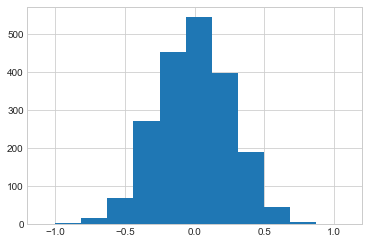

In [3]:
np.random.seed(50)
a = np.random.normal(size=2000)
a = a/max(abs(a))

plt.hist(a)
plt.xlim(-1.2, 1.2)

print('The sentiment is {}'.format(si.overall_sentiment(a)))

We then use a skewed normal distribution to generate _Sad_ tweets. To do this we will again transform the values so that they take values between -1 and 1.

As expected, the sentiment obtained is negative.

The sentiment is -0.3305968501877548


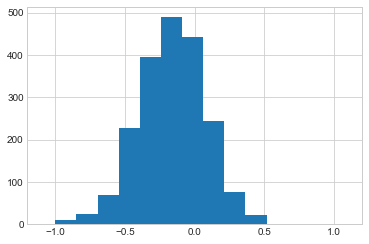

In [4]:
a = skewnorm.rvs(-1, size=2000)
a = a/max(abs(a))

plt.hist(a)
plt.xlim(-1.2, 1.2)

print('The sentiment is {}'.format(si.overall_sentiment(a)))

We can also see that the larger the value of the skew of the distribution, the larger the absolute value of the overall sentiment measured (with the corresponding sign).

The sentiment is -0.4691907252848164


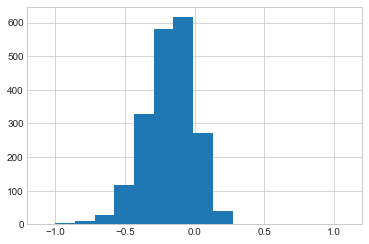

In [5]:
a = skewnorm.rvs(-2, size=2000)
a = a/max(abs(a))

plt.hist(a)
plt.xlim(-1.2, 1.2)

print('The sentiment is {}'.format(si.overall_sentiment(a)))

Lastly, we can also see that this is true for _Happy_ tweets as well, in this case obtaining a positive overall sentiment.

The sentiment is 0.5896811173712347


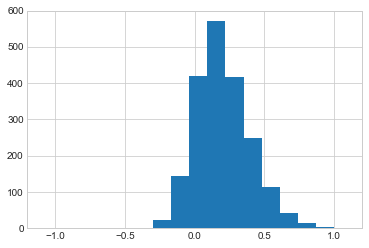

In [6]:
a = skewnorm.rvs(2, size=2000)
a = a/max(abs(a))

plt.hist(a)
plt.xlim(-1.2, 1.2)

print('The sentiment is {}'.format(si.overall_sentiment(a)))

### Sentimental impact estimation

After having obtained the sentiment measures we can lastly get an estimation for the sentimental impact. For this we implemented a function that receives an array of _overall sentiments_ computed daily for a certain timeframe centered on the conflict date.

It returns the _impact of the conflict_ by
comparing the changes in sentiment that take place before and
after a conflict date.

It returns a value in the range [0.0, 1.0].

It does not penalize how long it takes for the average sentiment
to change, since we would like to have some margin that accounts for the difference between timezones.

In [7]:
from sentiment_impact import measure_impact
import numpy as np

#### Basic examples

We start by looking at three different cases where we would like the sentiment impact to remain the same.

In [8]:
ex0 = np.array([.01,-.03,-.04,.5,.6,.8,.82])
# We define ex1 as -ex0
ex1 = - ex0
# We define ex3 as 
ex3 = ex0.copy()
ex3[[4,5]] += [.2, -.2]

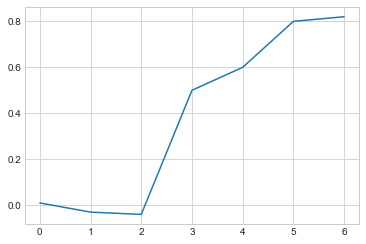

0.135


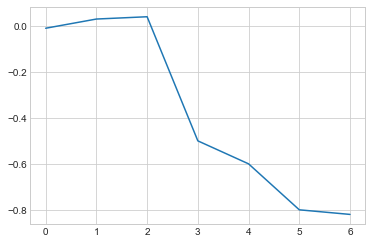

0.135


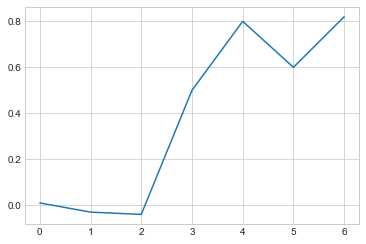

0.135


In [11]:
plt.plot(range(len(ex0)), ex0)
plt.show()
print(measure_impact(ex0))

plt.plot(range(len(ex1)), ex1)
plt.show()
print(measure_impact(ex1))

plt.plot(range(len(ex3)), ex3)
plt.show()
print(measure_impact(ex3))

The first one is the case when a certain event causes the general sentiment to improve.

The second one is the negative of the previous one. Since the function we implemented only considers the absolute difference in sentiment changes before and after the conflict, it is reasonable to expect that we would obtain the same _impact value_ from both.

Lastly, we consider a case similar to the previous one but where there is a subgroup of the public that reacts later.

As shown, the three cases have the same sentimental impact equal to 0.135.

#### Complex cases

Now we will look at the results obtained where there are greater variations either before or after the date of the event or conflict.

We start by considering a base case, where the impact equals 0.735.

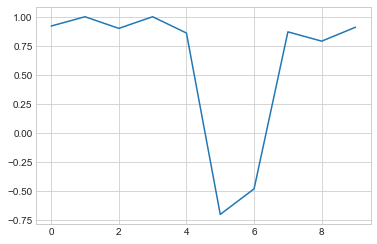

0.735


In [15]:
ex4 = np.array([ 0.92, 1.0, 0.90, 1.0, 0.86,
       -0.70, -0.48, 0.87, 0.79,  0.91])

plt.plot(range(len(ex4)),ex4)
print(measure_impact(ex4))

By increasing the changes _before_ the conflict date, in this case the impact is reduced.

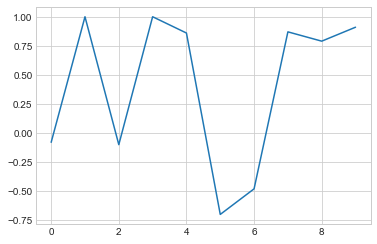

0.25499999999999989

In [13]:
ex5 = ex4.copy()
ex5[[0,2]] -= 1
ex5 = np.clip(ex5, -1, 1)
plt.plot(range(10),ex5)
print(measure_impact(ex5))

On the other hand, by increasing the changes _after_ the conflict date the impact increases.

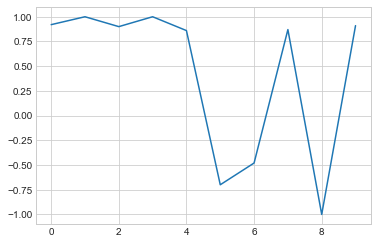

0.88500000000000001

In [14]:
ex6 = ex4.copy()
ex6[8] -= 2
ex6 = np.clip(ex6, -1,1)
plt.plot(range(10),ex6)
plt.show()
max(ex6)
min(ex6)
measure_impact(ex6)